In [1]:
# Cell 1: Imports and setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,5)
plt.style.use('seaborn-v0_8')

try:
    from wordcloud import WordCloud
    import nltk
    nltk.download('stopwords', quiet=True)
    from nltk.corpus import stopwords
    STOPWORDS = set(stopwords.words('english'))
    WORDCLOUD_AVAILABLE = True
except Exception as e:
    print("wordcloud/nltk not available, skipping wordcloud. Error:", e)
    WORDCLOUD_AVAILABLE = False


In [5]:
DATA_PATH = "./dataset/metadata/metadata.csv"


In [6]:
cols_to_use = None 

print("Loading:", DATA_PATH)
try:
    df = pd.read_csv(DATA_PATH, usecols=cols_to_use)
except MemoryError:
    # fallback to chunked reading (load first 20,000 rows only)
    print("MemoryError while loading full CSV — creating smaller DataFrame...")
    reader = pd.read_csv(DATA_PATH, chunksize=20000)
    df = next(reader)   # just take the first chunk
except FileNotFoundError:
    raise FileNotFoundError("metadata.csv not found in current directory. Download metadata.csv and place it here.")
    
print("Loaded DataFrame shape:", df.shape)

Loading: ./dataset/metadata/metadata.csv


C:\Users\dell\AppData\Local\Temp\ipykernel_24564\2320575149.py:5: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH, usecols=cols_to_use)


Loaded DataFrame shape: (1056660, 19)


In [7]:
# Cell 5: Basic exploration
df.head(5)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [8]:
# Cell 6: DataFrame dimensions and dtypes
print("Rows, Columns:", df.shape)
print("\nColumns and dtypes:")
print(df.dtypes)


Rows, Columns: (1056660, 19)

Columns and dtypes:
cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object


In [9]:
# Cell 7: Missing values and basic stats
print("Missing values per column (top 20):")
print(df.isnull().sum().sort_values(ascending=False).head(20))

print("\nBasic numeric stats (if any numeric cols):")
display(df.describe(include=[np.number]))


Missing values per column (top 20):
mag_id              1056660
arxiv_id            1042411
pmc_json_files       740918
sha                  682894
pdf_json_files       682894
pmcid                667089
who_covidence_id     573725
pubmed_id            557728
doi                  399880
url                  369726
abstract             235544
journal               87322
s2_id                 80192
authors               23869
publish_time           1814
title                   503
cord_uid                  0
source_x                  0
license                   0
dtype: int64

Basic numeric stats (if any numeric cols):


,mag_id,s2_id
count,0.0,9.764680e+05
mean,NaN,2.175871e+08
std,NaN,5.312281e+07
min,NaN,9.600000e+01
25%,NaN,2.211411e+08
50%,NaN,2.320829e+08
75%,NaN,2.373948e+08
max,NaN,2.491936e+08


In [10]:
# Cell 8: Data cleaning - duplicates, dates, and required fields
# Drop exact-duplicate rows
df = df.drop_duplicates()
# Normalize column names (lowercase)
df.columns = [c.strip() for c in df.columns]

# Common columns in CORD-19: 'title','abstract','publish_time','journal','source_x','authors','sha'...
# Ensure 'publish_time' exists
if 'publish_time' in df.columns:
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
else:
    print("Warning: 'publish_time' column not found.")

# Create a 'year' column
if 'publish_time' in df.columns:
    df['year'] = df['publish_time'].dt.year
else:
    df['year'] = np.nan

# Abstract word count
if 'abstract' in df.columns:
    df['abstract_word_count'] = df['abstract'].fillna("").apply(lambda x: len(str(x).split()))
else:
    df['abstract_word_count'] = np.nan

# Drop rows missing both title and abstract (for this assignment we want at least a title)
if 'title' in df.columns:
    df = df[~df['title'].isnull()]
else:
    raise ValueError("No 'title' column found in dataset; expected it in metadata.csv")

print("After cleaning shape:", df.shape)


After cleaning shape: (1056157, 21)


In [11]:
# Cell 9: Identify columns with many missing values
missing_frac = df.isnull().mean().sort_values(ascending=False)
missing_frac.head(20)


mag_id              1.000000
arxiv_id            0.986509
pmc_json_files      0.701047
pdf_json_files      0.646111
sha                 0.646111
pmcid               0.631151
who_covidence_id    0.542745
pubmed_id           0.528070
publish_time        0.509136
year                0.509136
doi                 0.378617
url                 0.350067
abstract            0.222649
journal             0.082679
s2_id               0.075925
authors             0.022536
cord_uid            0.000000
title               0.000000
source_x            0.000000
license             0.000000
dtype: float64

year
1856.0         3
1857.0         1
1860.0         2
1864.0         1
1876.0         1
           ...  
2020.0    164537
2021.0    219335
2022.0     85265
2023.0         1
2024.0         1
Name: count, Length: 75, dtype: int64


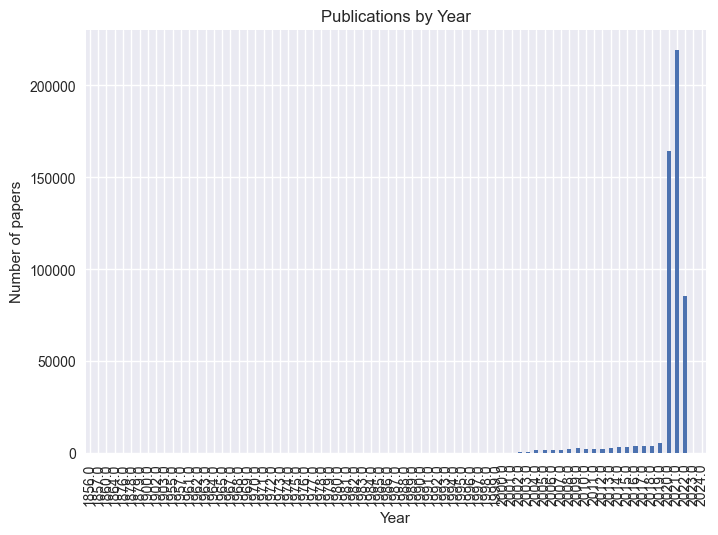

In [12]:
# Cell 10: Basic analyses - count papers by publication year
year_counts = df['year'].value_counts().sort_index()
print(year_counts)
# Plot
year_counts.plot(kind='bar')
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of papers")
plt.show()


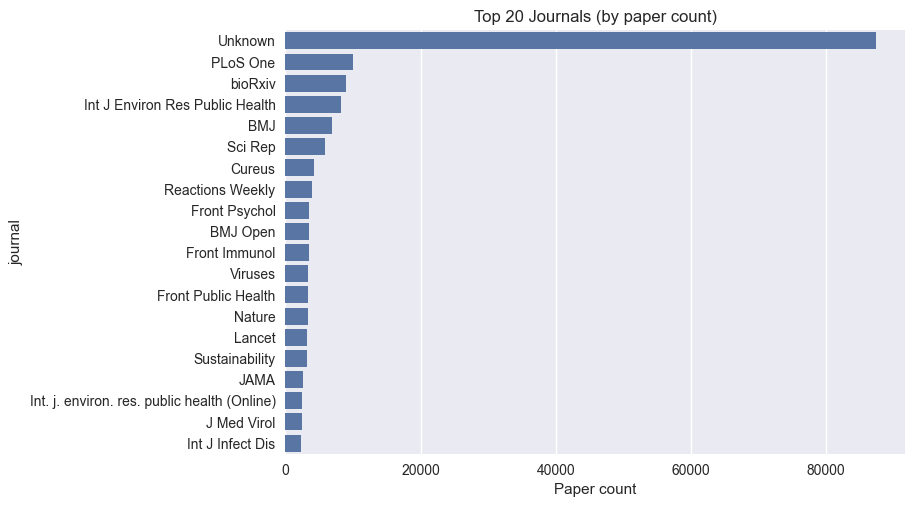

In [13]:
# Cell 11: Top journals publishing COVID-19 research
if 'journal' in df.columns:
    top_journals = df['journal'].fillna("Unknown").value_counts().head(20)
    sns.barplot(x=top_journals.values, y=top_journals.index)
    plt.title("Top 20 Journals (by paper count)")
    plt.xlabel("Paper count")
    plt.show()
else:
    print("No 'journal' column")


Top title words: [('the', 561680), ('and', 541909), ('covid', 498538), ('for', 207441), ('with', 163176), ('pandemic', 140356), ('during', 115646), ('sars', 105887), ('cov', 103749), ('patients', 96723), ('study', 75471), ('from', 74210), ('health', 66887), ('coronavirus', 57640), ('disease', 56452), ('analysis', 49069), ('infection', 48064), ('care', 46377), ('review', 43466), ('based', 42293), ('impact', 42209), ('clinical', 37299), ('case', 36759), ('among', 32351), ('using', 31853), ('risk', 29156), ('acute', 27458), ('respiratory', 26965), ('treatment', 26098), ('virus', 25489)]


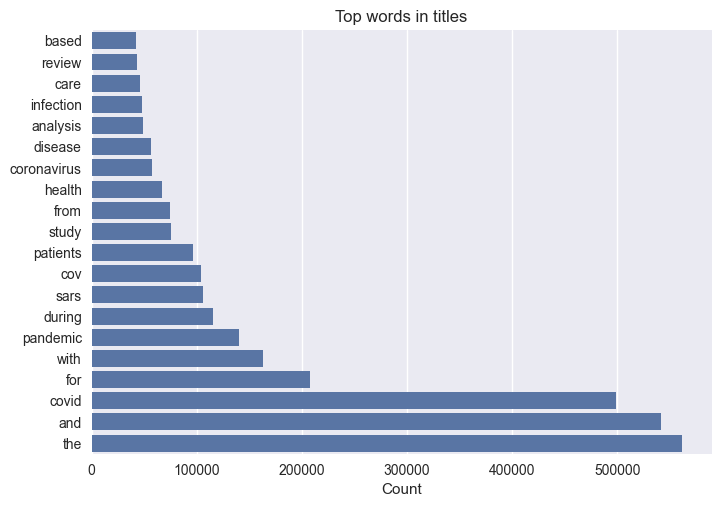

In [14]:
# Cell 12: Most frequent words in titles (simple word freq)
import re
from collections import Counter

def simple_tokenize(text):
    text = str(text).lower()
    # remove non-letters
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = text.split()
    return [t for t in tokens if len(t) > 2]  # drop short tokens

all_titles = df['title'].dropna().astype(str)
counter = Counter()
for t in all_titles:
    counter.update(simple_tokenize(t))

common_words = counter.most_common(30)
print("Top title words:", common_words[:30])

# Plot top 20 words
words, counts = zip(*common_words[:20])
sns.barplot(x=list(counts)[::-1], y=list(words)[::-1])
plt.xlabel("Count")
plt.title("Top words in titles")
plt.show()


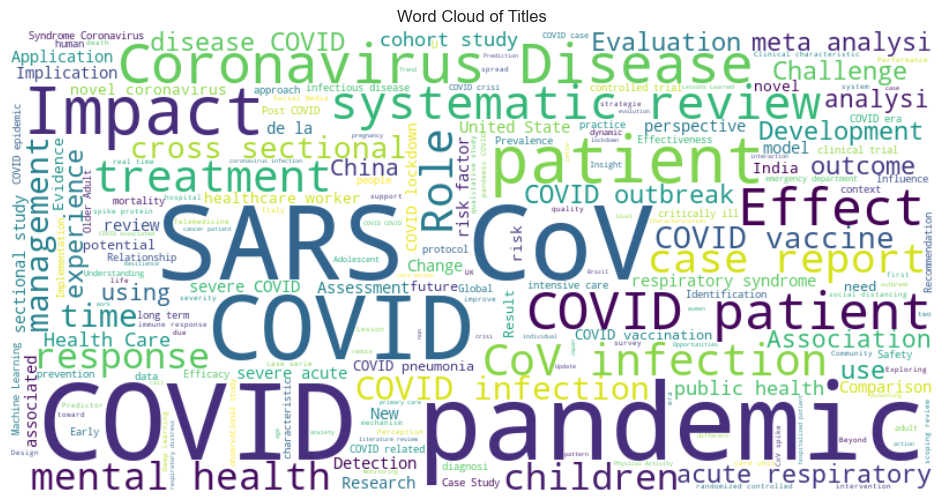

In [15]:
# Cell 13: Word cloud of titles 
if WORDCLOUD_AVAILABLE:
    text = " ".join(all_titles.tolist())
    wc = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color='white').generate(text)
    plt.figure(figsize=(14,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Titles")
    plt.show()
else:
    print("Wordcloud is not available; skip this step.")


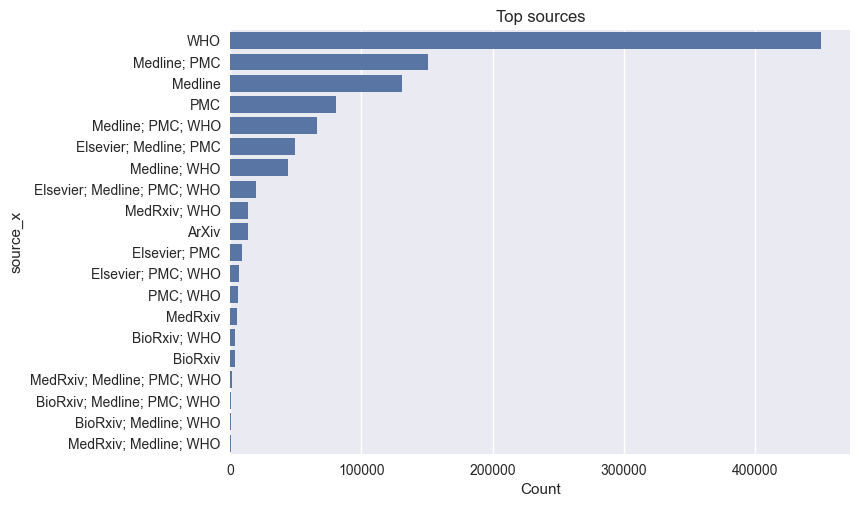

In [16]:
# Cell 14: Distribution by source (source_x)
if 'source_x' in df.columns:
    src = df['source_x'].fillna("Unknown").value_counts().head(20)
    sns.barplot(x=src.values, y=src.index)
    plt.title("Top sources")
    plt.xlabel("Count")
    plt.show()
else:
    print("No 'source_x' column in dataset.")


In [17]:
# Cell 15: Save a cleaned small CSV for use in streamlit 
CLEANED_PATH = "metadata_cleaned_sample.csv"
cols_to_save = ['cord_uid','title','abstract','publish_time','year','journal','source_x','authors','abstract_word_count'] if 'cord_uid' in df.columns else df.columns
try:
    df.to_csv(CLEANED_PATH, index=False)
    print("Saved cleaned sample to", CLEANED_PATH)
except Exception as e:
    print("Couldn't save cleaned file:", e)


Saved cleaned sample to metadata_cleaned_sample.csv


In [18]:
# Cell 16: Simple reflections / summary output (print)
total_papers = len(df)
years_present = sorted([int(y) for y in df['year'].dropna().unique()]) if 'year' in df.columns else []
print(f"Total papers (after basic cleaning): {total_papers}")
print("Years present:", years_present)
print("Top journals (top 10):")
print(df['journal'].fillna("Unknown").value_counts().head(10))


Total papers (after basic cleaning): 1056157
Years present: [1856, 1857, 1860, 1864, 1876, 1878, 1879, 1900, 1902, 1903, 1955, 1957, 1961, 1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Top journals (top 10):
journal
Unknown                            87322
PLoS One                            9953
bioRxiv                             8961
Int J Environ Res Public Health     8201
BMJ                                 6928
Sci Rep                             5935
Cureus                              4212
Reactions Weekly                    3891
Front Psychol                       3541
BMJ Open                            3515
Name: count, dtype: int64
